In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import pandas as pd
from collections import Counter
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d
from pathlib import Path
from urllib import request
from ppxf.ppxf import ppxf, robust_sigma
import ppxf.ppxf_util as util
import ppxf.sps_util as lib
from vorbin.voronoi_2d_binning import voronoi_2d_binning
from plotbin.display_bins import display_bins
from ppxf.ppxf_util import log_rebin
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import math
import csv
from scipy import ndimage
import glob
from time import time 
from astropy.wcs import WCS

In [3]:
fluxos='/home/sabrinadopico/Área de trabalho/análise3866/5-Flux/'
output_voronoi='/home/sabrinadopico/Área de trabalho/análise3866/2-Voronoi/'
output_ppxfb='/home/sabrinadopico/Área de trabalho/análise3866/3-PppxfB/out/'
output_ppxfr='/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/'

In [4]:
caminho_arquivo_saida = fluxos+ 'fluxos_totais_hb.dat'  # Novo arquivo de saída específico para H-beta
resultados_fluxos_hbeta = []
for nome_arquivo in os.listdir(output_ppxfb):
    if nome_arquivo.endswith('_1comp.out'):
        caminho_completo_arquivo = os.path.join(output_ppxfb, nome_arquivo)
        print(caminho_completo_arquivo)
        intensidades_pico = {}
        sigma_valor = None
        vel_rad = None
        with open(caminho_completo_arquivo, 'r') as file:
            lines = file.readlines()
            for i, line in enumerate(lines):
                if 'Gas V=' in line:
                    sigma_valor = float(line.split('sigma=')[1].split()[0])
                    vel_rad = float(line.split('V=')[1].split()[0])
                if 'Emission lines peak intensity:' in line:
                    j = i + 1
                    while j < len(lines) and lines[j].strip():
                        parts = lines[j].split()
                        if len(parts) >= 2:
                            line_name = parts[0]
                            try:
                                intensity = float(parts[1])
                                intensidades_pico[line_name] = intensity
                            except ValueError:
                                print(f"Valor não numérico encontrado na linha: {lines[j]}")
                        j += 1
                    break
        if sigma_valor is not None:
            if 'Hbeta' in intensidades_pico:  
                intensidade_hbeta = intensidades_pico['Hbeta']
                print(intensidade_hbeta)
                FWHM_instrumental = 1.6768500303542762
                c = 299792.0  # Velocidade da luz em km/s
                lam_line = 4862 * ((vel_rad / c) + 1)  #AJUSTAR LAMBDA!!!
                print(lam_line)
                sigma_line = np.sqrt((FWHM_instrumental / 2.355) ** 2 + (sigma_valor * lam_line / c) ** 2)
                print(sigma_line)
                fluxo_hbeta = intensidade_hbeta * np.sqrt(2 * np.pi) * sigma_line
                print(fluxo_hbeta)
                resultados_fluxos_hbeta.append((nome_arquivo, 'Hbeta', fluxo_hbeta))
        else:
            print(f"Valor de sigma não encontrado em {nome_arquivo}.")
with open(caminho_arquivo_saida, 'w') as f_out:
    f_out.write("Arquivo,Fluxo Totalhb\n")
    for resultado in resultados_fluxos_hbeta:
        nome_arquivo, linha, fluxo = resultado
        f_out.write(f"{nome_arquivo},{linha},{fluxo:.6e}\n")
print(f"Resultados de H-beta salvos em: {caminho_arquivo_saida}")


/home/sabrinadopico/Área de trabalho/análise3866/3-PppxfB/out/espectro_bin34.txt_1comp.out
0.114
4861.723808974222
0.860458039167113
0.2458807233125211
/home/sabrinadopico/Área de trabalho/análise3866/3-PppxfB/out/espectro_bin24.txt_1comp.out
0.125
4862.1879655894745
0.8702530991642946
0.27267512805630956
/home/sabrinadopico/Área de trabalho/análise3866/3-PppxfB/out/espectro_bin18.txt_1comp.out
0.0233
4861.697860316486
0.8464240864210507
0.04943492375329506
/home/sabrinadopico/Área de trabalho/análise3866/3-PppxfB/out/espectro_bin11.txt_1comp.out
0.333
4862.345117147889
0.8125839912553099
0.6782697206616921
/home/sabrinadopico/Área de trabalho/análise3866/3-PppxfB/out/espectro_bin61.txt_1comp.out
0.00986
4861.796627394994
1.0015274521334074
0.024753106309260305
/home/sabrinadopico/Área de trabalho/análise3866/3-PppxfB/out/espectro_bin37.txt_1comp.out
0.396
4861.629420731707
0.8248783078713411
0.8187946626974713
/home/sabrinadopico/Área de trabalho/análise3866/3-PppxfB/out/espectro_bin5

In [5]:
caminho_arquivo_saida = fluxos+ 'fluxos_totais_o3.dat' 
resultados_fluxos_o3 = []

for nome_arquivo in os.listdir(output_ppxfb):
    if nome_arquivo.endswith('_1comp.out'):
        caminho_completo_arquivo = os.path.join(output_ppxfb, nome_arquivo)
        print(caminho_completo_arquivo)
        intensidades_pico = {}
        sigma_valor = None
        vel_rad = None
        with open(caminho_completo_arquivo, 'r') as file:
            lines = file.readlines()
            for i, line in enumerate(lines):
                if 'Gas V=' in line:
                    sigma_valor = float(line.split('sigma=')[1].split()[0])
                    vel_rad = float(line.split('V=')[1].split()[0])
                if 'Emission lines peak intensity:' in line:
                    j = i + 1
                    while j < len(lines) and lines[j].strip():
                        parts = lines[j].split()
                        if len(parts) >= 2:
                            line_name = parts[0]
                            try:
                                intensity = float(parts[1])
                                intensidades_pico[line_name] = intensity
                            except ValueError:
                                print(f"Valor não numérico encontrado na linha: {lines[j]}")
                        j += 1
                    break

        if sigma_valor is not None:
            if '[OIII]5007d' in intensidades_pico:  
                intensidade_o3 = intensidades_pico['[OIII]5007d']
                FWHM_instrumental = 1.6768500303542762
                c = 299792.0  # Velocidade da luz em km/s
                lam_line = 5007 * ((vel_rad / c) + 1)  # ajustar lambda!!!
                sigma_line = np.sqrt((FWHM_instrumental / 2.355) ** 2 + (sigma_valor * lam_line / c) ** 2)
                fluxo_o3 = intensidade_o3 * np.sqrt(2 * np.pi) * sigma_line
                resultados_fluxos_o3.append((nome_arquivo, '[OIII]5007d', fluxo_o3))
        else:
            print(f"Valor de sigma não encontrado em {nome_arquivo}.")
with open(caminho_arquivo_saida, 'w') as f_out:
    f_out.write("Arquivo,Fluxo Totalo3\n")
    for resultado in resultados_fluxos_o3:
        nome_arquivo, linha, fluxo = resultado
        f_out.write(f"{nome_arquivo},{linha},{fluxo:.6e}\n")
print(f"Resultados de [OIII]5007d salvos em: {caminho_arquivo_saida}")


/home/sabrinadopico/Área de trabalho/análise3866/3-PppxfB/out/espectro_bin34.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/3-PppxfB/out/espectro_bin24.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/3-PppxfB/out/espectro_bin18.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/3-PppxfB/out/espectro_bin11.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/3-PppxfB/out/espectro_bin61.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/3-PppxfB/out/espectro_bin37.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/3-PppxfB/out/espectro_bin57.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/3-PppxfB/out/espectro_bin47.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/3-PppxfB/out/espectro_bin17.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/3-PppxfB/out/espectro_bin30.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/3-PppxfB/out/espectro_bin21.txt_1comp.out

         X     Y  BIN_NUM  Arquivo  Fluxo Totalhb
0     10.0   0.0       20       20       0.029975
1     11.0   0.0       20       20       0.029975
2     12.0   0.0       20       20       0.029975
3     18.0   0.0       21       21       0.084473
4     23.0   0.0       21       21       0.084473
...    ...   ...      ...      ...            ...
1116  27.0  47.0       68       68       0.147727
1117   8.0  48.0       70       70       0.120094
1118   9.0  48.0       70       70       0.120094
1119  22.0  48.0       68       68       0.147727
1120  31.0  48.0       68       68       0.147727

[1121 rows x 5 columns]
Dados do DataFrame salvos em: /home/sabrinadopico/Área de trabalho/análise3866/5-Flux/data_hb.dat
RA Min: 24.138252122924534, RA Max: 24.138723940784654
Dec Min: 13.974040281655789, Dec Max: 13.974727647330598


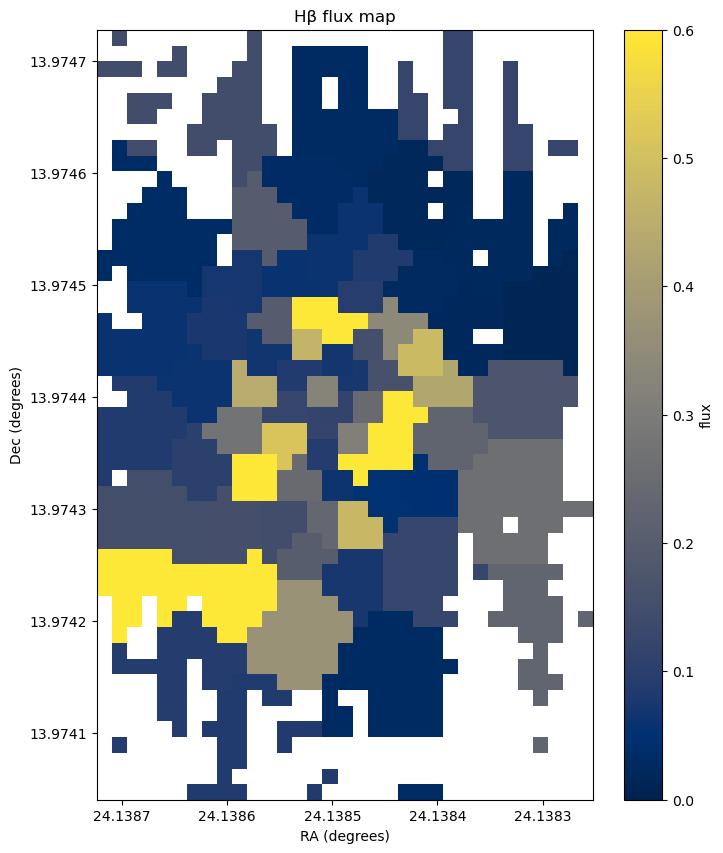

In [7]:
import matplotlib.ticker as ticker
wcs_params = {
    'CTYPE1': 'RA---TAN',     # Projeção tangente para RA
    'CTYPE2': 'DEC--TAN',     # Projeção tangente para Dec
    'CRPIX1': 3134.20381624,            # Ponto de referência para o eixo 1 (pixel)
    'CRPIX2': 2089.65827139703,            # Ponto de referência para o eixo 2 (pixel)
    'CRVAL1': 24.0925255955211,    # RA da estrela guia (graus)
    'CRVAL2': 13.9448116152325,    # Dec da estrela guia (graus)
    'CD1_1': -1.43037913232859E-05,            # Escala de RA (graus por pixel)
    'CD2_2': -1.43182793542337E-05,            # Escala de Dec (graus por pixel)
    'RADECSYS': 'FK5',        # Sistema de coordenadas
    'EQUINOX': 2000.0         # Equinócio do sistema de coordenadas
}

wcs = WCS(naxis=2)  # Dois eixos, RA e Dec
wcs.wcs.ctype = [wcs_params['CTYPE1'], wcs_params['CTYPE2']]
wcs.wcs.crpix = [wcs_params['CRPIX1'], wcs_params['CRPIX2']]
wcs.wcs.crval = [wcs_params['CRVAL1'], wcs_params['CRVAL2']]
wcs.wcs.cd = [[wcs_params['CD1_1'], 0], [0, wcs_params['CD2_2']]]
wcs.wcs.radesys = wcs_params['RADECSYS']
wcs.wcs.equinox = wcs_params['EQUINOX']

bins_flux = pd.read_csv(fluxos+'fluxos_totais_hb.dat',skiprows=1, names=['Arquivo', 'Fluxo Totalhb'])
coords_bins = pd.read_csv(output_voronoi+'voronoi_n2.txt', sep='\s+',skiprows=1, names=['X', 'Y', 'BIN_NUM'])
merged_data = coords_bins.merge(bins_flux, left_on='BIN_NUM', right_on='Arquivo', how='left')
merged_data.dropna(subset=['X', 'Y', 'Fluxo Totalhb'], inplace=True)
merged_data['X'] = pd.to_numeric(merged_data['X'], errors='coerce')
merged_data['Y'] = pd.to_numeric(merged_data['Y'], errors='coerce')
merged_data['Fluxo Totalhb'] = (pd.to_numeric(merged_data['Fluxo Totalhb'], errors='coerce'))
merged_data.dropna(subset=['X', 'Y', 'Fluxo Totalhb'], inplace=True)
print(merged_data)

x_max = int(merged_data['X'].max()) + 1
y_max = int(merged_data['Y'].max()) + 1
flux_map = np.full((y_max, x_max), np.nan)
for _, row in merged_data.iterrows():
    x, y, flux = int(row['X']), int(row['Y']), row['Fluxo Totalhb']
    flux_map[y, x] = flux
# Gerando as coordenadas de pixel

csv_output_path = fluxos+'data_hb.dat'
merged_data.to_csv(csv_output_path, index=False)
print(f"Dados do DataFrame salvos em: {csv_output_path}")
pixels_x, pixels_y = np.meshgrid(np.arange(x_max), np.arange(y_max), indexing='xy')

# Convertendo para coordenadas RA e Dec
ra_dec = wcs.all_pix2world(pixels_x.flatten(), pixels_y.flatten(), 1)


# Ajuste os limites para garantir que o campo de visão esteja correto
ra_min, ra_max = ra_dec[0].min(), ra_dec[0].max()
dec_min, dec_max = ra_dec[1].min(), ra_dec[1].max()

# Se os valores forem muito amplos, tente ajustar manualmente ou verificar os dados
print(f"RA Min: {ra_min}, RA Max: {ra_max}")
print(f"Dec Min: {dec_min}, Dec Max: {dec_max}")


# Plotando o mapa com limites manuais
plt.figure(figsize=(8, 10))
plt.imshow(flux_map, origin='lower', cmap='cividis', aspect='auto',
           extent=[ra_min, ra_max, dec_min, dec_max], vmin=0, vmax=0.6)
plt.colorbar(label='flux')
plt.xlabel('RA (degrees)')

plt.ylabel('Dec (degrees)')
plt.title('Hβ flux map')  # Inverter o eixo RA se necessário
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.yaxis.get_major_formatter().set_scientific(False)
plt.gca().invert_xaxis()  # Inverter o eixo RA se necessário
plt.show()


         X     Y  BIN_NUM  Arquivo  Fluxo Totalo3
0     10.0   0.0       20       20       0.152490
1     11.0   0.0       20       20       0.152490
2     12.0   0.0       20       20       0.152490
3     18.0   0.0       21       21       0.121640
4     23.0   0.0       21       21       0.121640
...    ...   ...      ...      ...            ...
1116  27.0  47.0       68       68       0.056489
1117   8.0  48.0       70       70       0.024144
1118   9.0  48.0       70       70       0.024144
1119  22.0  48.0       68       68       0.056489
1120  31.0  48.0       68       68       0.056489

[1121 rows x 5 columns]
Dados do DataFrame salvos em: /home/sabrinadopico/Área de trabalho/análise3866/5-Flux/data_o3.dat
RA Min: 24.138252122924534, RA Max: 24.138723940784654
Dec Min: 13.974040281655789, Dec Max: 13.974727647330598


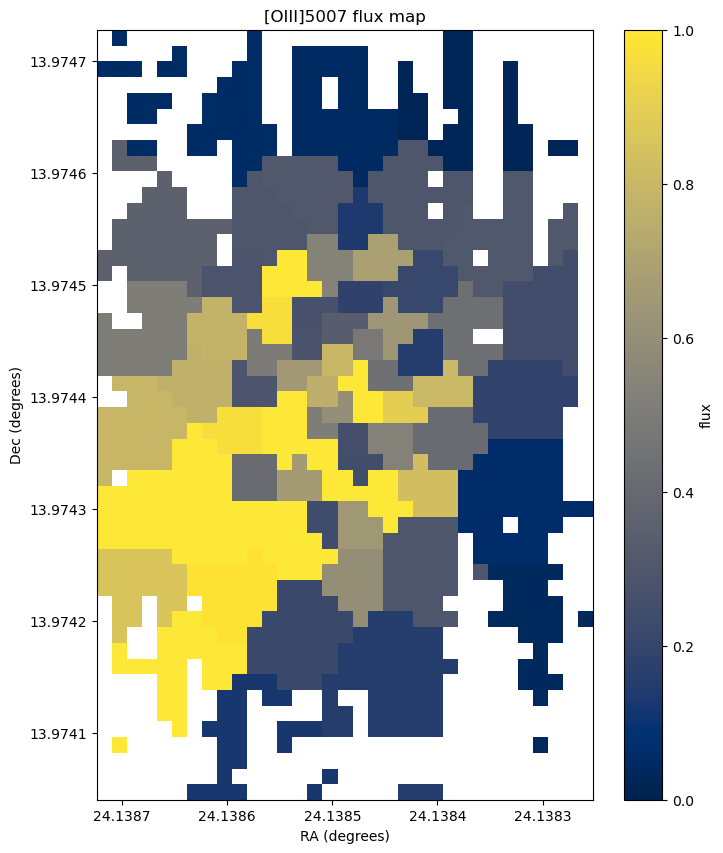

In [8]:
wcs_params = {
    'CTYPE1': 'RA---TAN',     # Projeção tangente para RA
    'CTYPE2': 'DEC--TAN',     # Projeção tangente para Dec
    'CRPIX1': 3134.20381624,            # Ponto de referência para o eixo 1 (pixel)
    'CRPIX2': 2089.65827139703,            # Ponto de referência para o eixo 2 (pixel)
    'CRVAL1': 24.0925255955211,    # RA da estrela guia (graus)
    'CRVAL2': 13.9448116152325,    # Dec da estrela guia (graus)
    'CD1_1': -1.43037913232859E-05,            # Escala de RA (graus por pixel)
    'CD2_2': -1.43182793542337E-05,            # Escala de Dec (graus por pixel)
    'RADECSYS': 'FK5',        # Sistema de coordenadas
    'EQUINOX': 2000.0         # Equinócio do sistema de coordenadas
}

wcs = WCS(naxis=2)  # Dois eixos, RA e Dec
wcs.wcs.ctype = [wcs_params['CTYPE1'], wcs_params['CTYPE2']]
wcs.wcs.crpix = [wcs_params['CRPIX1'], wcs_params['CRPIX2']]
wcs.wcs.crval = [wcs_params['CRVAL1'], wcs_params['CRVAL2']]
wcs.wcs.cd = [[wcs_params['CD1_1'], 0], [0, wcs_params['CD2_2']]]
wcs.wcs.radesys = wcs_params['RADECSYS']
wcs.wcs.equinox = wcs_params['EQUINOX']

bins_flux = pd.read_csv(fluxos+'fluxos_totais_o3.dat',skiprows=1, names=['Arquivo', 'Fluxo Totalo3'])
coords_bins = pd.read_csv(output_voronoi+'voronoi_n2.txt', sep='\s+',skiprows=1, names=['X', 'Y', 'BIN_NUM'])
merged_data = coords_bins.merge(bins_flux, left_on='BIN_NUM', right_on='Arquivo', how='left')
merged_data.dropna(subset=['X', 'Y', 'Fluxo Totalo3'], inplace=True)
merged_data['X'] = pd.to_numeric(merged_data['X'], errors='coerce')
merged_data['Y'] = pd.to_numeric(merged_data['Y'], errors='coerce')
merged_data['Fluxo Totalo3'] = (pd.to_numeric(merged_data['Fluxo Totalo3'], errors='coerce'))
merged_data.dropna(subset=['X', 'Y', 'Fluxo Totalo3'], inplace=True)
print(merged_data)

x_max = int(merged_data['X'].max()) + 1
y_max = int(merged_data['Y'].max()) + 1
flux_map = np.full((y_max, x_max), np.nan)
for _, row in merged_data.iterrows():
    x, y, flux = int(row['X']), int(row['Y']), row['Fluxo Totalo3']
    flux_map[y, x] = flux

csv_output_path = fluxos+'data_o3.dat'
merged_data.to_csv(csv_output_path, index=False)
print(f"Dados do DataFrame salvos em: {csv_output_path}")

pixels_x, pixels_y = np.meshgrid(np.arange(x_max), np.arange(y_max), indexing='xy')

# Convertendo para coordenadas RA e Dec
ra_dec = wcs.all_pix2world(pixels_x.flatten(), pixels_y.flatten(), 1)


# Ajuste os limites para garantir que o campo de visão esteja correto
ra_min, ra_max = ra_dec[0].min(), ra_dec[0].max()
dec_min, dec_max = ra_dec[1].min(), ra_dec[1].max()

# Se os valores forem muito amplos, tente ajustar manualmente ou verificar os dados
print(f"RA Min: {ra_min}, RA Max: {ra_max}")
print(f"Dec Min: {dec_min}, Dec Max: {dec_max}")


# Plotando o mapa com limites manuais
plt.figure(figsize=(8, 10))
plt.imshow(flux_map, origin='lower', cmap='cividis', aspect='auto',
           extent=[ra_min, ra_max, dec_min, dec_max], vmin=0, vmax=1)
plt.colorbar(label='flux')
plt.xlabel('RA (degrees)')

plt.ylabel('Dec (degrees)')
plt.title('[OIII]5007 flux map')  # Inverter o eixo RA se necessário
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.yaxis.get_major_formatter().set_scientific(False)
plt.gca().invert_xaxis()  # Inverter o eixo RA se necessário
plt.show()

Colunas disponíveis no DataFrame 'merged_data': Index(['X', 'Y', 'BIN_NUM', 'Fluxo Totalhb', 'Fluxo Totalo3'], dtype='object')
         X     Y  BIN_NUM  OIII_Hbeta_Ratio  logratio
0     10.0   0.0       20          5.087241  0.706482
1     11.0   0.0       20          5.087241  0.706482
2     12.0   0.0       20          5.087241  0.706482
3     18.0   0.0       21          1.439987  0.158359
4     23.0   0.0       21          1.439987  0.158359
...    ...   ...      ...               ...       ...
1116  27.0  47.0       68          0.382390 -0.417494
1117   8.0  48.0       70          0.201044 -0.696708
1118   9.0  48.0       70          0.201044 -0.696708
1119  22.0  48.0       68          0.382390 -0.417494
1120  31.0  48.0       68          0.382390 -0.417494

[1121 rows x 5 columns]
Dados salvos em: /home/sabrinadopico/Área de trabalho/análise3866/5-Flux/merged_data_o3hb.dat
RA Min: 24.138252122924534, RA Max: 24.138723940784654
Dec Min: 13.974040281655789, Dec Max: 13.9747276473

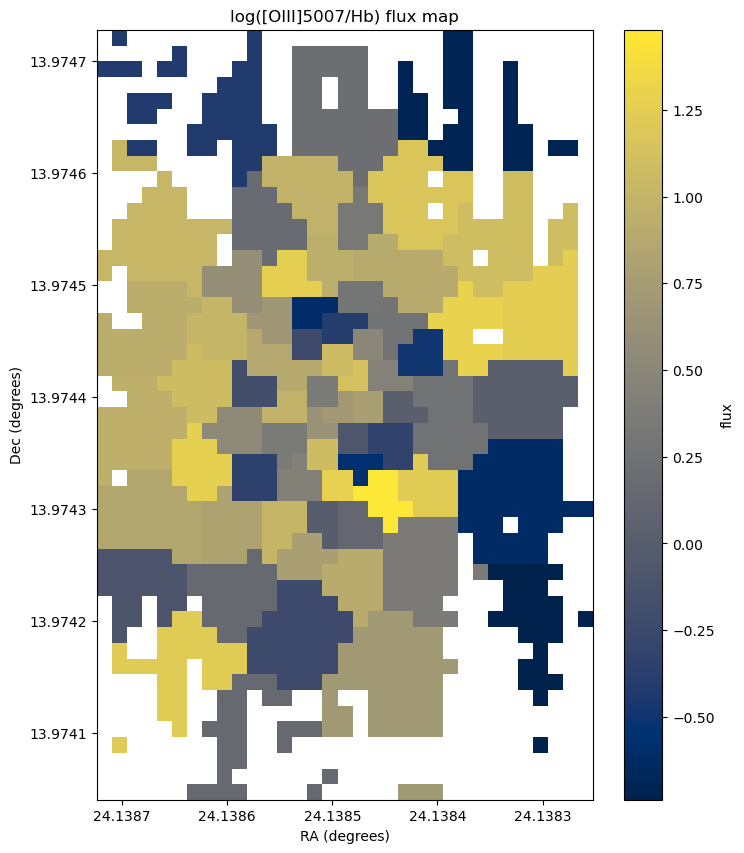

In [9]:
wcs_params = {
    'CTYPE1': 'RA---TAN',     # Projeção tangente para RA
    'CTYPE2': 'DEC--TAN',     # Projeção tangente para Dec
    'CRPIX1': 3134.20381624,            # Ponto de referência para o eixo 1 (pixel)
    'CRPIX2': 2089.65827139703,            # Ponto de referência para o eixo 2 (pixel)
    'CRVAL1': 24.0925255955211,    # RA da estrela guia (graus)
    'CRVAL2': 13.9448116152325,    # Dec da estrela guia (graus)
    'CD1_1': -1.43037913232859E-05,            # Escala de RA (graus por pixel)
    'CD2_2': -1.43182793542337E-05,            # Escala de Dec (graus por pixel)
    'RADECSYS': 'FK5',        # Sistema de coordenadas
    'EQUINOX': 2000.0         # Equinócio do sistema de coordenadas
}

wcs = WCS(naxis=2)  # Dois eixos, RA e Dec
wcs.wcs.ctype = [wcs_params['CTYPE1'], wcs_params['CTYPE2']]
wcs.wcs.crpix = [wcs_params['CRPIX1'], wcs_params['CRPIX2']]
wcs.wcs.crval = [wcs_params['CRVAL1'], wcs_params['CRVAL2']]
wcs.wcs.cd = [[wcs_params['CD1_1'], 0], [0, wcs_params['CD2_2']]]
wcs.wcs.radesys = wcs_params['RADECSYS']
wcs.wcs.equinox = wcs_params['EQUINOX']

bins_flux_hb = pd.read_csv(fluxos+'data_hb.dat', skiprows=1, names=['X', 'Y', 'BIN_NUM', 'Arquivo', 'Fluxo Totalhb'])
bins_flux_oiii = pd.read_csv(fluxos+'data_o3.dat', skiprows=1, names=['X', 'Y', 'BIN_NUM', 'Arquivo', 'Fluxo Totalo3'])

merged_data = pd.merge(bins_flux_hb[['X', 'Y', 'BIN_NUM', 'Fluxo Totalhb']],
                       bins_flux_oiii[['X', 'Y', 'BIN_NUM', 'Fluxo Totalo3']], 
                       on=['X', 'Y', 'BIN_NUM'], 
                       how='inner')
print("Colunas disponíveis no DataFrame 'merged_data':", merged_data.columns)

merged_data['X'] = pd.to_numeric(merged_data['X'], errors='coerce')
merged_data['Y'] = pd.to_numeric(merged_data['Y'], errors='coerce')
merged_data['Fluxo Totalhb'] = pd.to_numeric(merged_data['Fluxo Totalhb'], errors='coerce')
merged_data['Fluxo Totalo3'] = pd.to_numeric(merged_data['Fluxo Totalo3'], errors='coerce')
merged_data.dropna(subset=['X', 'Y', 'Fluxo Totalhb', 'Fluxo Totalo3'], inplace=True)
merged_data['OIII_Hbeta_Ratio'] = merged_data['Fluxo Totalo3'] / merged_data['Fluxo Totalhb']
merged_data['logratio']=np.log10(merged_data['OIII_Hbeta_Ratio'])
print(merged_data[['X', 'Y', 'BIN_NUM', 'OIII_Hbeta_Ratio', 'logratio']])

output_file = fluxos+'merged_data_o3hb.dat'
merged_data[['X', 'Y', 'BIN_NUM', 'OIII_Hbeta_Ratio','logratio']].to_csv(output_file, index=False)
print(f"Dados salvos em: {output_file}")

x_max = int(merged_data['X'].max()) + 1
y_max = int(merged_data['Y'].max()) + 1
flux_map = np.full((y_max, x_max), np.nan)
for _, row in merged_data.iterrows():
    x, y, flux = int(row['X']), int(row['Y']), row['logratio']
    flux_map[y, x] = flux

pixels_x, pixels_y = np.meshgrid(np.arange(x_max), np.arange(y_max), indexing='xy')

# Convertendo para coordenadas RA e Dec
ra_dec = wcs.all_pix2world(pixels_x.flatten(), pixels_y.flatten(), 1)


# Ajuste os limites para garantir que o campo de visão esteja correto
ra_min, ra_max = ra_dec[0].min(), ra_dec[0].max()
dec_min, dec_max = ra_dec[1].min(), ra_dec[1].max()

# Se os valores forem muito amplos, tente ajustar manualmente ou verificar os dados
print(f"RA Min: {ra_min}, RA Max: {ra_max}")
print(f"Dec Min: {dec_min}, Dec Max: {dec_max}")


# Plotando o mapa com limites manuais
plt.figure(figsize=(8, 10))
plt.imshow(flux_map, origin='lower', cmap='cividis', aspect='auto',
           extent=[ra_min, ra_max, dec_min, dec_max])
plt.colorbar(label='flux')
plt.xlabel('RA (degrees)')

plt.ylabel('Dec (degrees)')
plt.title('log([OIII]5007/Hb) flux map')  # Inverter o eixo RA se necessário
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.yaxis.get_major_formatter().set_scientific(False)
plt.gca().invert_xaxis()  # Inverter o eixo RA se necessário
plt.show()



In [10]:
caminho_arquivo_saida = fluxos+'fluxos_totais_ha.dat'
resultados_fluxos_halpha = []
for nome_arquivo in os.listdir(output_ppxfr):
    if nome_arquivo.endswith('_1comp.out'):
        caminho_completo_arquivo = os.path.join(output_ppxfr, nome_arquivo)
        print(caminho_completo_arquivo)
        intensidades_pico = {}
        sigma_valor = None
        vel_rad = None
        with open(caminho_completo_arquivo, 'r') as file:
            lines = file.readlines()
            for i, line in enumerate(lines):
                if 'Gas V=' in line:
                    sigma_valor = float(line.split('sigma=')[1].split()[0])
                    vel_rad = float(line.split('V=')[1].split()[0])
                if 'Emission lines peak intensity:' in line:
                    j = i + 1
                    while j < len(lines) and lines[j].strip():
                        parts = lines[j].split()
                        if len(parts) >= 2:
                            line_name = parts[0]
                            try:
                                intensity = float(parts[1])
                                intensidades_pico[line_name] = intensity
                            except ValueError:
                                print(f"Valor não numérico encontrado na linha: {lines[j]}")
                        j += 1
                    break
        if sigma_valor is not None:
            if 'Halpha' in intensidades_pico:
                intensidade_halpha=intensidades_pico['Halpha']
                FWHM_instrumental = 1.477233490947213
                c = 299792.0  
                lam_line = 6563  * ((vel_rad / c) + 1) #Ajustar a linha!!!
                sigma_line = np.sqrt((FWHM_instrumental / 2.355) ** 2 + (sigma_valor * lam_line / c) ** 2)
                fluxo_halpha = intensidade_halpha * np.sqrt(2 * np.pi) * sigma_line
                resultados_fluxos_halpha.append((nome_arquivo, 'Halpha', fluxo_halpha))
        else:
            print(f"Valor de sigma não encontrado em {nome_arquivo}.")
with open(caminho_arquivo_saida, 'w') as f_out:
    f_out.write("Arquivo,Fluxo Totalha\n")
    for resultado in resultados_fluxos_halpha:
        nome_arquivo, linha, fluxo = resultado
        f_out.write(f"{nome_arquivo},{linha},{fluxo:.6e}\n")
print(f"Resultados salvos em: {caminho_arquivo_saida}")


/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin34.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin84.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin96.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin24.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin82.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin77.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin18.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin11.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin61.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin37.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin81.txt_1comp.out
/home/sabr

In [11]:
caminho_arquivo_saida = fluxos+'fluxos_totais_n2.dat'  # Novo arquivo de saída específico para H-beta
resultados_fluxos_n2 = []
for nome_arquivo in os.listdir(output_ppxfr):
    if nome_arquivo.endswith('_1comp.out'):
        caminho_completo_arquivo = os.path.join(output_ppxfr, nome_arquivo)
        print(caminho_completo_arquivo)
        intensidades_pico = {}
        sigma_valor = None
        vel_rad = None
        with open(caminho_completo_arquivo, 'r') as file:
            lines = file.readlines()
            for i, line in enumerate(lines):
                if 'Gas V=' in line:
                    sigma_valor = float(line.split('sigma=')[1].split()[0])
                    vel_rad = float(line.split('V=')[1].split()[0])
                if 'Emission lines peak intensity:' in line:
                    j = i + 1
                    while j < len(lines) and lines[j].strip():
                        parts = lines[j].split()
                        if len(parts) >= 2:
                            line_name = parts[0]
                            try:
                                intensity = float(parts[1])
                                intensidades_pico[line_name] = intensity
                            except ValueError:
                                print(f"Valor não numérico encontrado na linha: {lines[j]}")
                        j += 1
                    break
        if sigma_valor is not None:
            if '[NII]6583d' in intensidades_pico:  
                intensidade_n2 = intensidades_pico['[NII]6583d']
                FWHM_instrumental = 1.477233490947213
                c = 299792.0  # Velocidade da luz em km/s
                lam_line = 6583 * ((vel_rad / c) + 1)  # Ajustar!!!
                sigma_line = np.sqrt((FWHM_instrumental / 2.355) ** 2 + (sigma_valor * lam_line / c) ** 2)
                fluxo_n2 = intensidade_n2 * np.sqrt(2 * np.pi) * sigma_line
                resultados_fluxos_n2.append((nome_arquivo, '[NII]6583d', fluxo_n2))
        else:
            print(f"Valor de sigma não encontrado em {nome_arquivo}.")

with open(caminho_arquivo_saida, 'w') as f_out:
    f_out.write("Arquivo,Fluxo Totaln2\n")
    for resultado in resultados_fluxos_n2:
        nome_arquivo, linha, fluxo = resultado
        f_out.write(f"{nome_arquivo},{linha},{fluxo:.6e}\n")
print(f"Resultados de N2 salvos em: {caminho_arquivo_saida}")


/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin34.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin84.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin96.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin24.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin82.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin77.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin18.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin11.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin61.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin37.txt_1comp.out
/home/sabrinadopico/Área de trabalho/análise3866/4-PpxfR/out/espectro_bin81.txt_1comp.out
/home/sabr

         X     Y  BIN_NUM  Arquivo  Fluxo Totalha
0     10.0   0.0       20       20       1.453758
1     11.0   0.0       20       20       1.453758
2     12.0   0.0       20       20       1.453758
3     18.0   0.0       21       21       0.099308
4     23.0   0.0       21       21       0.099308
...    ...   ...      ...      ...            ...
1116  27.0  47.0       68       68       0.177421
1117   8.0  48.0       70       70       0.391901
1118   9.0  48.0       70       70       0.391901
1119  22.0  48.0       68       68       0.177421
1120  31.0  48.0       68       68       0.177421

[1121 rows x 5 columns]
Dados do DataFrame salvos em: /home/sabrinadopico/Área de trabalho/análise3866/5-Flux/data_ha.dat
RA Min: 24.138252122924534, RA Max: 24.138723940784654
Dec Min: 13.974040281655789, Dec Max: 13.974727647330598


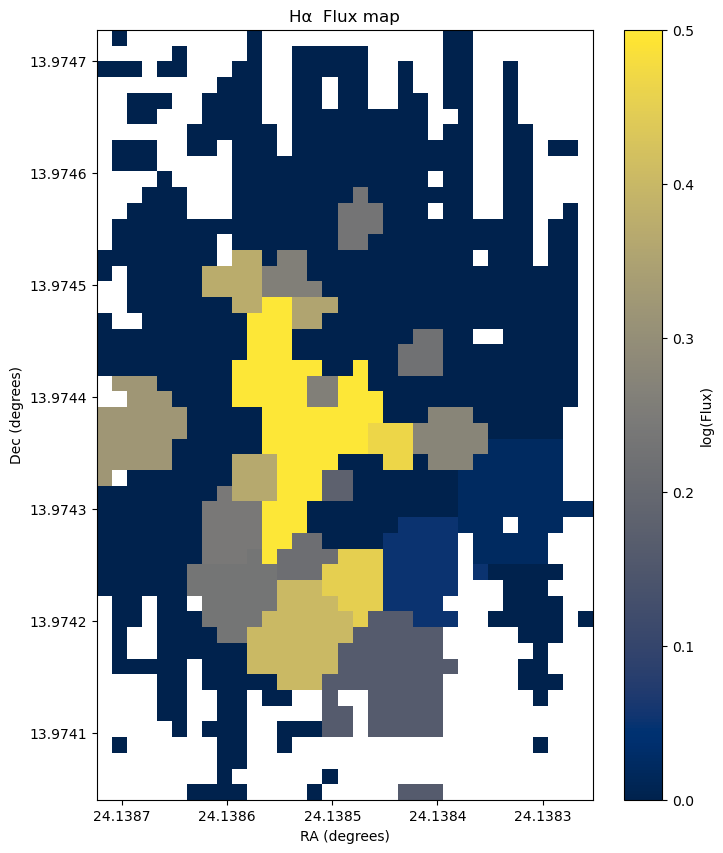

In [13]:
# Definindo o WCS
wcs_params = {
    'CTYPE1': 'RA---TAN',     # Projeção tangente para RA
    'CTYPE2': 'DEC--TAN',     # Projeção tangente para Dec
    'CRPIX1': 3134.20381624,            # Ponto de referência para o eixo 1 (pixel)
    'CRPIX2': 2089.65827139703,            # Ponto de referência para o eixo 2 (pixel)
    'CRVAL1': 24.0925255955211,    # RA da estrela guia (graus)
    'CRVAL2': 13.9448116152325,    # Dec da estrela guia (graus)
    'CD1_1': -1.43037913232859E-05,            # Escala de RA (graus por pixel)
    'CD2_2': -1.43182793542337E-05,            # Escala de Dec (graus por pixel)
    'RADECSYS': 'FK5',        # Sistema de coordenadas
    'EQUINOX': 2000.0         # Equinócio do sistema de coordenadas
}

wcs = WCS(naxis=2)  # Dois eixos, RA e Dec
wcs.wcs.ctype = [wcs_params['CTYPE1'], wcs_params['CTYPE2']]
wcs.wcs.crpix = [wcs_params['CRPIX1'], wcs_params['CRPIX2']]
wcs.wcs.crval = [wcs_params['CRVAL1'], wcs_params['CRVAL2']]
wcs.wcs.cd = [[wcs_params['CD1_1'], 0], [0, wcs_params['CD2_2']]]
wcs.wcs.radesys = wcs_params['RADECSYS']
wcs.wcs.equinox = wcs_params['EQUINOX']


bins_flux = pd.read_csv(fluxos+'fluxos_totais_ha.dat',skiprows=1, names=['Arquivo', 'Fluxo Totalha'])
coords_bins = pd.read_csv(output_voronoi+'voronoi_n2.txt', sep='\s+',skiprows=1, names=['X', 'Y', 'BIN_NUM'])
merged_data = coords_bins.merge(bins_flux, left_on='BIN_NUM', right_on='Arquivo', how='left')
merged_data.dropna(subset=['X', 'Y', 'Fluxo Totalha'], inplace=True)
merged_data['X'] = pd.to_numeric(merged_data['X'], errors='coerce')
merged_data['Y'] = pd.to_numeric(merged_data['Y'], errors='coerce')
merged_data['Fluxo Totalha'] = (pd.to_numeric(merged_data['Fluxo Totalha'], errors='coerce'))
merged_data.dropna(subset=['X', 'Y', 'Fluxo Totalha'], inplace=True)
print(merged_data)

x_max = int(merged_data['X'].max()) + 1
y_max = int(merged_data['Y'].max()) + 1
flux_map = np.full((y_max, x_max), np.nan)
for _, row in merged_data.iterrows():
    x, y, flux = int(row['X']), int(row['Y']), row['Fluxo Totalha']
    flux_map[y, x] = np.log10(flux)

csv_output_path = fluxos+'data_ha.dat'
merged_data.to_csv(csv_output_path, index=False)
print(f"Dados do DataFrame salvos em: {csv_output_path}")
# Gerando as coordenadas de pixel
pixels_x, pixels_y = np.meshgrid(np.arange(x_max), np.arange(y_max), indexing='xy')

# Convertendo para coordenadas RA e Dec
ra_dec = wcs.all_pix2world(pixels_x.flatten(), pixels_y.flatten(), 1)


# Ajuste os limites para garantir que o campo de visão esteja correto
ra_min, ra_max = ra_dec[0].min(), ra_dec[0].max()
dec_min, dec_max = ra_dec[1].min(), ra_dec[1].max()

# Se os valores forem muito amplos, tente ajustar manualmente ou verificar os dados
print(f"RA Min: {ra_min}, RA Max: {ra_max}")
print(f"Dec Min: {dec_min}, Dec Max: {dec_max}")


# Plotando o mapa com limites manuais
plt.figure(figsize=(8, 10))
plt.imshow(flux_map, origin='lower', cmap='cividis', aspect='auto',
           extent=[ra_min, ra_max, dec_min, dec_max], vmin=0, vmax=0.5)
plt.colorbar(label='log(Flux)')
plt.xlabel('RA (degrees)')

plt.ylabel('Dec (degrees)')
plt.title('Hα  Flux map')  # Inverter o eixo RA se necessário
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.yaxis.get_major_formatter().set_scientific(False)
plt.gca().invert_xaxis()  # Inverter o eixo RA se necessário
plt.show()

         X     Y  BIN_NUM  Arquivo  Fluxo Totaln2
0     10.0   0.0       20       20       0.006778
1     11.0   0.0       20       20       0.006778
2     12.0   0.0       20       20       0.006778
3     18.0   0.0       21       21       0.004799
4     23.0   0.0       21       21       0.004799
...    ...   ...      ...      ...            ...
1116  27.0  47.0       68       68       0.003541
1117   8.0  48.0       70       70       0.001891
1118   9.0  48.0       70       70       0.001891
1119  22.0  48.0       68       68       0.003541
1120  31.0  48.0       68       68       0.003541

[1121 rows x 5 columns]
Dados do DataFrame salvos em: /home/sabrinadopico/Área de trabalho/análise3866/5-Flux/data_n2.dat
RA Min: 24.138252122924534, RA Max: 24.138723940784654
Dec Min: 13.974040281655789, Dec Max: 13.974727647330598


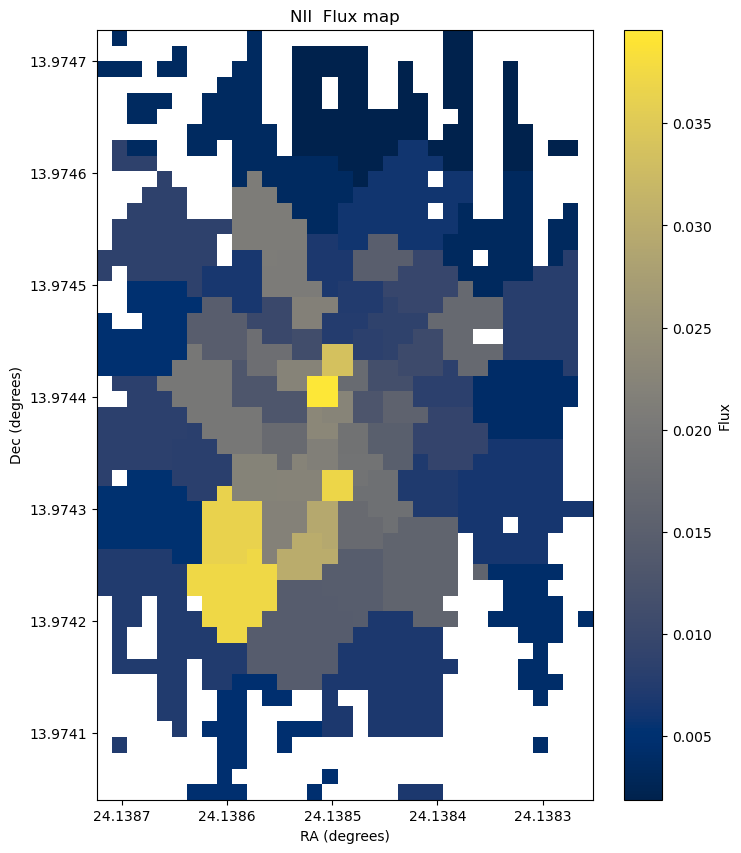

In [14]:
wcs_params = {
    'CTYPE1': 'RA---TAN',     # Projeção tangente para RA
    'CTYPE2': 'DEC--TAN',     # Projeção tangente para Dec
    'CRPIX1': 3134.20381624,            # Ponto de referência para o eixo 1 (pixel)
    'CRPIX2': 2089.65827139703,            # Ponto de referência para o eixo 2 (pixel)
    'CRVAL1': 24.0925255955211,    # RA da estrela guia (graus)
    'CRVAL2': 13.9448116152325,    # Dec da estrela guia (graus)
    'CD1_1': -1.43037913232859E-05,            # Escala de RA (graus por pixel)
    'CD2_2': -1.43182793542337E-05,            # Escala de Dec (graus por pixel)
    'RADECSYS': 'FK5',        # Sistema de coordenadas
    'EQUINOX': 2000.0         # Equinócio do sistema de coordenadas
}

wcs = WCS(naxis=2)  # Dois eixos, RA e Dec
wcs.wcs.ctype = [wcs_params['CTYPE1'], wcs_params['CTYPE2']]
wcs.wcs.crpix = [wcs_params['CRPIX1'], wcs_params['CRPIX2']]
wcs.wcs.crval = [wcs_params['CRVAL1'], wcs_params['CRVAL2']]
wcs.wcs.cd = [[wcs_params['CD1_1'], 0], [0, wcs_params['CD2_2']]]
wcs.wcs.radesys = wcs_params['RADECSYS']
wcs.wcs.equinox = wcs_params['EQUINOX']

bins_flux = pd.read_csv(fluxos+'fluxos_totais_n2.dat',skiprows=1, names=['Arquivo', 'Fluxo Totaln2'])
coords_bins = pd.read_csv(output_voronoi+'voronoi_n2.txt', sep='\s+',skiprows=1, names=['X', 'Y', 'BIN_NUM'])
merged_data = coords_bins.merge(bins_flux, left_on='BIN_NUM', right_on='Arquivo', how='left')
merged_data.dropna(subset=['X', 'Y', 'Fluxo Totaln2'], inplace=True)
merged_data['X'] = pd.to_numeric(merged_data['X'], errors='coerce')
merged_data['Y'] = pd.to_numeric(merged_data['Y'], errors='coerce')
merged_data['Fluxo Totaln2'] = (pd.to_numeric(merged_data['Fluxo Totaln2'], errors='coerce'))
merged_data.dropna(subset=['X', 'Y', 'Fluxo Totaln2'], inplace=True)
print(merged_data)

x_max = int(merged_data['X'].max()) + 1
y_max = int(merged_data['Y'].max()) + 1
flux_map = np.full((y_max, x_max), np.nan)
for _, row in merged_data.iterrows():
    x, y, flux = int(row['X']), int(row['Y']), row['Fluxo Totaln2']
    flux_map[y, x] = flux


csv_output_path = fluxos+'data_n2.dat'
merged_data.to_csv(csv_output_path, index=False)
print(f"Dados do DataFrame salvos em: {csv_output_path}")
pixels_x, pixels_y = np.meshgrid(np.arange(x_max), np.arange(y_max), indexing='xy')

# Convertendo para coordenadas RA e Dec
ra_dec = wcs.all_pix2world(pixels_x.flatten(), pixels_y.flatten(), 1)


# Ajuste os limites para garantir que o campo de visão esteja correto
ra_min, ra_max = ra_dec[0].min(), ra_dec[0].max()
dec_min, dec_max = ra_dec[1].min(), ra_dec[1].max()

# Se os valores forem muito amplos, tente ajustar manualmente ou verificar os dados
print(f"RA Min: {ra_min}, RA Max: {ra_max}")
print(f"Dec Min: {dec_min}, Dec Max: {dec_max}")


# Plotando o mapa com limites manuais
plt.figure(figsize=(8, 10))
plt.imshow(flux_map, origin='lower', cmap='cividis', aspect='auto',
           extent=[ra_min, ra_max, dec_min, dec_max])
plt.colorbar(label='Flux')
plt.xlabel('RA (degrees)')

plt.ylabel('Dec (degrees)')
plt.title('NII  Flux map')  # Inverter o eixo RA se necessário
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.yaxis.get_major_formatter().set_scientific(False)
plt.gca().invert_xaxis()  # Inverter o eixo RA se necessário
plt.show()

Colunas disponíveis no DataFrame 'merged_data': Index(['X', 'Y', 'BIN_NUM', 'Fluxo Totalha', 'Fluxo Totaln2'], dtype='object')
         X     Y  BIN_NUM  NII_Halpha_Ratio  logration2ha
0     10.0   0.0       20          0.004662     -2.331403
1     11.0   0.0       20          0.004662     -2.331403
2     12.0   0.0       20          0.004662     -2.331403
3     18.0   0.0       21          0.048328     -1.315798
4     23.0   0.0       21          0.048328     -1.315798
...    ...   ...      ...               ...           ...
1116  27.0  47.0       68          0.019955     -1.699939
1117   8.0  48.0       70          0.004825     -2.316538
1118   9.0  48.0       70          0.004825     -2.316538
1119  22.0  48.0       68          0.019955     -1.699939
1120  31.0  48.0       68          0.019955     -1.699939

[1121 rows x 5 columns]
         X     Y  BIN_NUM  NII_Halpha_Ratio  logration2ha
0     10.0   0.0       20          0.004662     -2.331403
1     11.0   0.0       20          0

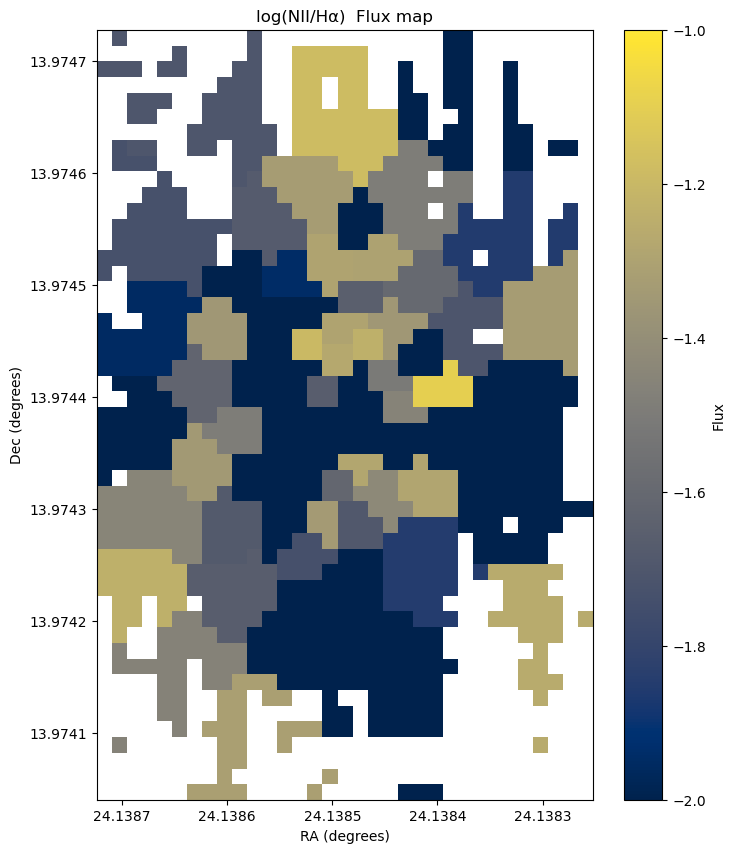

In [15]:
wcs_params = {
    'CTYPE1': 'RA---TAN',     # Projeção tangente para RA
    'CTYPE2': 'DEC--TAN',     # Projeção tangente para Dec
    'CRPIX1': 3134.20381624,            # Ponto de referência para o eixo 1 (pixel)
    'CRPIX2': 2089.65827139703,            # Ponto de referência para o eixo 2 (pixel)
    'CRVAL1': 24.0925255955211,    # RA da estrela guia (graus)
    'CRVAL2': 13.9448116152325,    # Dec da estrela guia (graus)
    'CD1_1': -1.43037913232859E-05,            # Escala de RA (graus por pixel)
    'CD2_2': -1.43182793542337E-05,            # Escala de Dec (graus por pixel)
    'RADECSYS': 'FK5',        # Sistema de coordenadas
    'EQUINOX': 2000.0         # Equinócio do sistema de coordenadas
}

wcs = WCS(naxis=2)  # Dois eixos, RA e Dec
wcs.wcs.ctype = [wcs_params['CTYPE1'], wcs_params['CTYPE2']]
wcs.wcs.crpix = [wcs_params['CRPIX1'], wcs_params['CRPIX2']]
wcs.wcs.crval = [wcs_params['CRVAL1'], wcs_params['CRVAL2']]
wcs.wcs.cd = [[wcs_params['CD1_1'], 0], [0, wcs_params['CD2_2']]]
wcs.wcs.radesys = wcs_params['RADECSYS']
wcs.wcs.equinox = wcs_params['EQUINOX']

bins_flux_hb = pd.read_csv(fluxos+'data_ha.dat', skiprows=1, names=['X', 'Y', 'BIN_NUM', 'Arquivo', 'Fluxo Totalha'])
bins_flux_oiii = pd.read_csv(fluxos+'data_n2.dat', skiprows=1, names=['X', 'Y', 'BIN_NUM', 'Arquivo', 'Fluxo Totaln2'])

merged_data = pd.merge(bins_flux_hb[['X', 'Y', 'BIN_NUM', 'Fluxo Totalha']],
                       bins_flux_oiii[['X', 'Y', 'BIN_NUM', 'Fluxo Totaln2']], 
                       on=['X', 'Y', 'BIN_NUM'], 
                       how='inner')
print("Colunas disponíveis no DataFrame 'merged_data':", merged_data.columns)
merged_data['X'] = pd.to_numeric(merged_data['X'], errors='coerce')
merged_data['Y'] = pd.to_numeric(merged_data['Y'], errors='coerce')
merged_data['Fluxo Totalha'] = pd.to_numeric(merged_data['Fluxo Totalha'], errors='coerce')
merged_data['Fluxo Totaln2'] = pd.to_numeric(merged_data['Fluxo Totaln2'], errors='coerce')
merged_data.dropna(subset=['X', 'Y', 'Fluxo Totalha', 'Fluxo Totaln2'], inplace=True)
merged_data['NII_Halpha_Ratio'] = merged_data['Fluxo Totaln2'] / merged_data['Fluxo Totalha']
merged_data['logration2ha']=np.log10(merged_data['NII_Halpha_Ratio'])
print(merged_data[['X', 'Y', 'BIN_NUM', 'NII_Halpha_Ratio', 'logration2ha']])
print(merged_data[['X', 'Y', 'BIN_NUM', 'NII_Halpha_Ratio','logration2ha']])

output_file = fluxos+'merged_data_n2ha.dat'
merged_data[['X', 'Y', 'BIN_NUM', 'NII_Halpha_Ratio','logration2ha']].to_csv(output_file, index=False)
print(f"Dados salvos em: {output_file}")

x_max = int(merged_data['X'].max()) + 1
y_max = int(merged_data['Y'].max()) + 1
flux_map = np.full((y_max, x_max), np.nan)
for _, row in merged_data.iterrows():
    x, y, flux = int(row['X']), int(row['Y']), row['logration2ha']
    flux_map[y, x] = flux

pixels_x, pixels_y = np.meshgrid(np.arange(x_max), np.arange(y_max), indexing='xy')

# Convertendo para coordenadas RA e Dec
ra_dec = wcs.all_pix2world(pixels_x.flatten(), pixels_y.flatten(), 1)


# Ajuste os limites para garantir que o campo de visão esteja correto
ra_min, ra_max = ra_dec[0].min(), ra_dec[0].max()
dec_min, dec_max = ra_dec[1].min(), ra_dec[1].max()

# Se os valores forem muito amplos, tente ajustar manualmente ou verificar os dados
print(f"RA Min: {ra_min}, RA Max: {ra_max}")
print(f"Dec Min: {dec_min}, Dec Max: {dec_max}")


# Plotando o mapa com limites manuais
plt.figure(figsize=(8, 10))
plt.imshow(flux_map, origin='lower', cmap='cividis', aspect='auto',
           extent=[ra_min, ra_max, dec_min, dec_max], vmin=-2,vmax=-1)
plt.colorbar(label='Flux')
plt.xlabel('RA (degrees)')

plt.ylabel('Dec (degrees)')
plt.title('log(NII/Hα)  Flux map')  # Inverter o eixo RA se necessário
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.yaxis.get_major_formatter().set_scientific(False)
plt.gca().invert_xaxis()  # Inverter o eixo RA se necessário
plt.show()



Colunas disponíveis no DataFrame 'merged_data': Index(['X', 'Y', 'BIN_NUM', 'Fluxo Totalha', 'Fluxo Totalhb'], dtype='object')
         X     Y  BIN_NUM  Halpha_Hbeta_Ratio
0     10.0   0.0       20           48.499161
1     11.0   0.0       20           48.499161
2     12.0   0.0       20           48.499161
3     18.0   0.0       21            1.175624
4     23.0   0.0       21            1.175624
...    ...   ...      ...                 ...
1116  27.0  47.0       68            1.201008
1117   8.0  48.0       70            3.263286
1118   9.0  48.0       70            3.263286
1119  22.0  48.0       68            1.201008
1120  31.0  48.0       68            1.201008

[1121 rows x 4 columns]
Dados salvos em: /home/sabrinadopico/Área de trabalho/análise3866/5-Flux/merged_data_hbha.dat
RA Min: 24.138252122924534, RA Max: 24.138723940784654
Dec Min: 13.974040281655789, Dec Max: 13.974727647330598


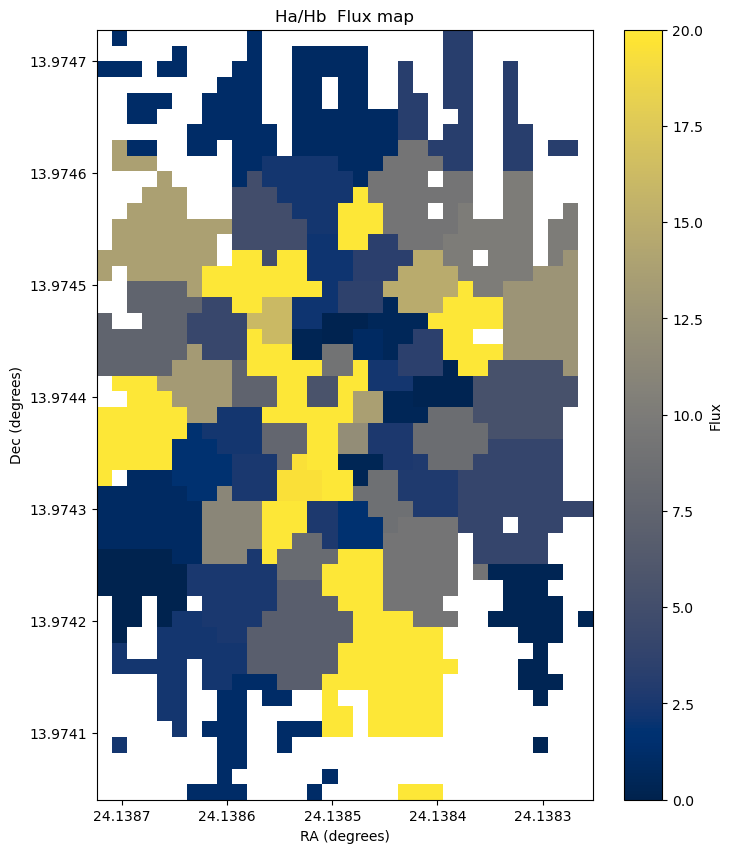

In [16]:
wcs_params = {
    'CTYPE1': 'RA---TAN',     # Projeção tangente para RA
    'CTYPE2': 'DEC--TAN',     # Projeção tangente para Dec
    'CRPIX1': 3134.20381624,            # Ponto de referência para o eixo 1 (pixel)
    'CRPIX2': 2089.65827139703,            # Ponto de referência para o eixo 2 (pixel)
    'CRVAL1': 24.0925255955211,    # RA da estrela guia (graus)
    'CRVAL2': 13.9448116152325,    # Dec da estrela guia (graus)
    'CD1_1': -1.43037913232859E-05,            # Escala de RA (graus por pixel)
    'CD2_2': -1.43182793542337E-05,            # Escala de Dec (graus por pixel)
    'RADECSYS': 'FK5',        # Sistema de coordenadas
    'EQUINOX': 2000.0         # Equinócio do sistema de coordenadas
}

wcs = WCS(naxis=2)  # Dois eixos, RA e Dec
wcs.wcs.ctype = [wcs_params['CTYPE1'], wcs_params['CTYPE2']]
wcs.wcs.crpix = [wcs_params['CRPIX1'], wcs_params['CRPIX2']]
wcs.wcs.crval = [wcs_params['CRVAL1'], wcs_params['CRVAL2']]
wcs.wcs.cd = [[wcs_params['CD1_1'], 0], [0, wcs_params['CD2_2']]]
wcs.wcs.radesys = wcs_params['RADECSYS']
wcs.wcs.equinox = wcs_params['EQUINOX']

bins_flux_hb = pd.read_csv(fluxos+'data_ha.dat', skiprows=1, names=['X', 'Y', 'BIN_NUM', 'Arquivo', 'Fluxo Totalha'])
bins_flux_oiii = pd.read_csv(fluxos+'data_hb.dat', skiprows=1, names=['X', 'Y', 'BIN_NUM', 'Arquivo', 'Fluxo Totalhb'])

merged_data = pd.merge(bins_flux_hb[['X', 'Y', 'BIN_NUM', 'Fluxo Totalha']],
                       bins_flux_oiii[['X', 'Y', 'BIN_NUM', 'Fluxo Totalhb']], 
                       on=['X', 'Y', 'BIN_NUM'], 
                       how='inner')
print("Colunas disponíveis no DataFrame 'merged_data':", merged_data.columns)
merged_data['X'] = pd.to_numeric(merged_data['X'], errors='coerce')
merged_data['Y'] = pd.to_numeric(merged_data['Y'], errors='coerce')
merged_data['Fluxo Totalha'] = pd.to_numeric(merged_data['Fluxo Totalha'], errors='coerce')
merged_data['Fluxo Totalhb'] = pd.to_numeric(merged_data['Fluxo Totalhb'], errors='coerce')
merged_data.dropna(subset=['X', 'Y', 'Fluxo Totalha', 'Fluxo Totalhb'], inplace=True)
merged_data['Halpha_Hbeta_Ratio'] = merged_data['Fluxo Totalha'] / merged_data['Fluxo Totalhb']
print(merged_data[['X', 'Y', 'BIN_NUM', 'Halpha_Hbeta_Ratio']])

output_file = fluxos+'merged_data_hbha.dat'
merged_data[['X', 'Y', 'BIN_NUM', 'Halpha_Hbeta_Ratio']].to_csv(output_file, index=False)
print(f"Dados salvos em: {output_file}")

x_max = int(merged_data['X'].max()) + 1
y_max = int(merged_data['Y'].max()) + 1
flux_map = np.full((y_max, x_max), np.nan)
for _, row in merged_data.iterrows():
    x, y, flux = int(row['X']), int(row['Y']), row['Halpha_Hbeta_Ratio']
    flux_map[y, x] = flux

pixels_x, pixels_y = np.meshgrid(np.arange(x_max), np.arange(y_max), indexing='xy')

# Convertendo para coordenadas RA e Dec
ra_dec = wcs.all_pix2world(pixels_x.flatten(), pixels_y.flatten(), 1)


# Ajuste os limites para garantir que o campo de visão esteja correto
ra_min, ra_max = ra_dec[0].min(), ra_dec[0].max()
dec_min, dec_max = ra_dec[1].min(), ra_dec[1].max()

# Se os valores forem muito amplos, tente ajustar manualmente ou verificar os dados
print(f"RA Min: {ra_min}, RA Max: {ra_max}")
print(f"Dec Min: {dec_min}, Dec Max: {dec_max}")


# Plotando o mapa com limites manuais
plt.figure(figsize=(8, 10))
plt.imshow(flux_map, origin='lower', cmap='cividis', aspect='auto',
           extent=[ra_min, ra_max, dec_min, dec_max], vmin=0, vmax=20)
plt.colorbar(label='Flux')
plt.xlabel('RA (degrees)')

plt.ylabel('Dec (degrees)')
plt.title('Ha/Hb  Flux map')  # Inverter o eixo RA se necessário
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.yaxis.get_major_formatter().set_scientific(False)
plt.gca().invert_xaxis()  # Inverter o eixo RA se necessário
plt.show()

         X     Y  Halpha_Hbeta_Ratio     E_B_V        A_V
0     10.0   0.0           48.499161  2.845760  10.557769
1     11.0   0.0           48.499161  2.845760  10.557769
2     12.0   0.0           48.499161  2.845760  10.557769
3     18.0   0.0            1.175624 -0.893744  -3.315792
4     23.0   0.0            1.175624 -0.893744  -3.315792
...    ...   ...                 ...       ...        ...
1116  27.0  47.0            1.201008 -0.872269  -3.236118
1117   8.0  48.0            3.263286  0.132614   0.491997
1118   9.0  48.0            3.263286  0.132614   0.491997
1119  22.0  48.0            1.201008 -0.872269  -3.236118
1120  31.0  48.0            1.201008 -0.872269  -3.236118

[1121 rows x 5 columns]


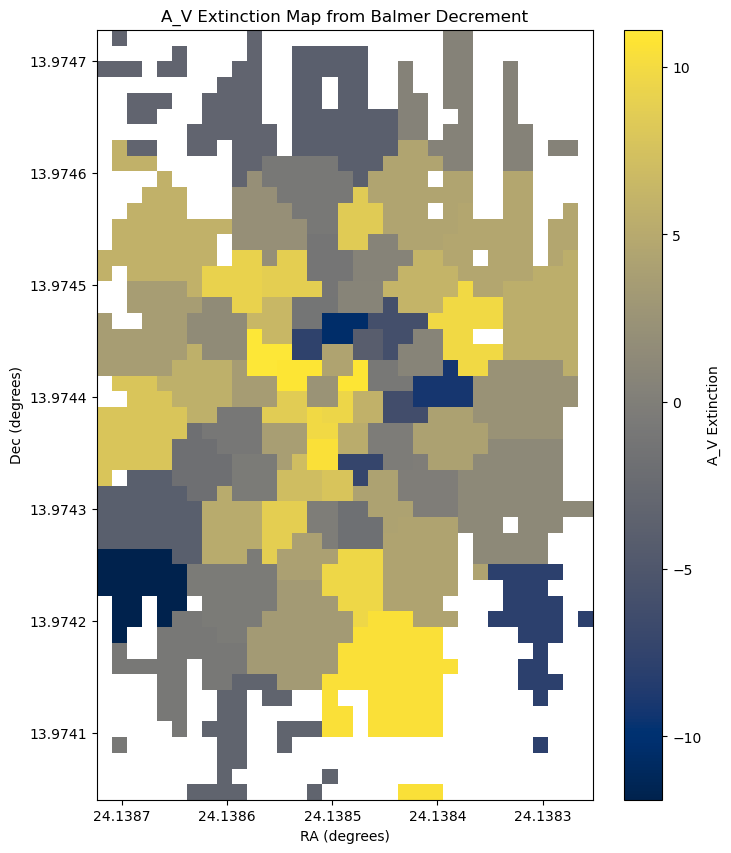

In [17]:
# Parâmetros de extinção para as linhas Hα e Hβ, de acordo com a lei de Calzetti
k_halpha = 2.63  # Valor típico para Hα
k_hbeta = 3.71   # Valor típico para Hβ
intrinsic_ratio = 2.86  # Razão intrínseca Hα/Hβ para regiões de formação estelar


# Calcular o E(B - V) e o A_V para cada bin
merged_data['E_B_V'] = 2.5 / (k_hbeta - k_halpha) * np.log10(merged_data['Halpha_Hbeta_Ratio'] / intrinsic_ratio)
merged_data['A_V'] = k_hbeta * merged_data['E_B_V']

# Exibir os primeiros valores para verificação
print(merged_data[['X', 'Y', 'Halpha_Hbeta_Ratio', 'E_B_V', 'A_V']])

# Converter em um mapa de extinção para visualização
x_max = int(merged_data['X'].max()) + 1
y_max = int(merged_data['Y'].max()) + 1
av_map = np.full((y_max, x_max), np.nan)
for _, row in merged_data.iterrows():
    x, y, av_value = int(row['X']), int(row['Y']), row['A_V']
    av_map[y, x] = av_value

# Configurar WCS e coordenadas para plotar
wcs_params = {
    'CTYPE1': 'RA---TAN',
    'CTYPE2': 'DEC--TAN',
    'CRPIX1': 3134.20381624,
    'CRPIX2': 2089.65827139703,
    'CRVAL1': 24.0925255955211,
    'CRVAL2': 13.9448116152325,
    'CD1_1': -1.43037913232859E-05,
    'CD2_2': -1.43182793542337E-05,
    'RADECSYS': 'FK5',
    'EQUINOX': 2000.0
}

wcs = WCS(naxis=2)
wcs.wcs.ctype = [wcs_params['CTYPE1'], wcs_params['CTYPE2']]
wcs.wcs.crpix = [wcs_params['CRPIX1'], wcs_params['CRPIX2']]
wcs.wcs.crval = [wcs_params['CRVAL1'], wcs_params['CRVAL2']]
wcs.wcs.cd = [[wcs_params['CD1_1'], 0], [0, wcs_params['CD2_2']]]
wcs.wcs.radesys = wcs_params['RADECSYS']
wcs.wcs.equinox = wcs_params['EQUINOX']

pixels_x, pixels_y = np.meshgrid(np.arange(x_max), np.arange(y_max), indexing='xy')
ra_dec = wcs.all_pix2world(pixels_x.flatten(), pixels_y.flatten(), 1)
ra_min, ra_max = ra_dec[0].min(), ra_dec[0].max()
dec_min, dec_max = ra_dec[1].min(), ra_dec[1].max()

# Plotar o mapa de extinção
plt.figure(figsize=(8, 10))
plt.imshow(av_map, origin='lower', cmap='cividis', aspect='auto',
           extent=[ra_min, ra_max, dec_min, dec_max])
plt.colorbar(label='A_V Extinction')
plt.xlabel('RA (degrees)')
plt.ylabel('Dec (degrees)')
plt.title('A_V Extinction Map from Balmer Decrement')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.yaxis.get_major_formatter().set_scientific(False)
plt.gca().invert_xaxis()
plt.show()
